# Implementing PCA From Scratch

### Importing Essential Modules and our custom implementation of PCA

In [54]:
from pca import PCA # Importing our custom implementation of PCA
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
x, y = make_classification(n_samples = 7000, n_features = 800, 
                             n_classes = 5,n_informative= 5)

In [56]:
x,x.shape

(array([[ 0.79092021, -0.506434  ,  2.09532069, ...,  0.11841292,
          2.88240901, -0.16562048],
        [ 0.27605251,  0.11826074, -0.29097989, ..., -0.74781845,
          1.03258022,  0.36166505],
        [ 0.11251656,  1.91574487,  0.14041256, ..., -0.03648767,
         -0.30381664,  1.30404291],
        ...,
        [ 0.52992533, -0.24209129, -0.1932117 , ..., -0.96146074,
          0.87077651,  0.6889668 ],
        [ 0.17217677, -1.24848785,  1.10659569, ..., -0.04126586,
          0.53076528, -0.02218173],
        [ 0.4794256 ,  0.98417867,  0.67270966, ..., -0.57495671,
         -0.41513999,  1.24624119]]),
 (7000, 800))

In [57]:
y

array([2, 2, 2, ..., 2, 3, 4])

In [58]:
pca=PCA(n_components=2)
pca.fit(x,standardized_data=False)

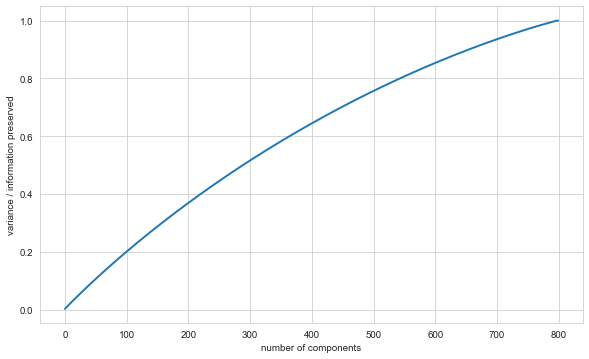

In [59]:
pca.plot_explained_variance()

In [60]:
dt=pca.transform(x,standardized_data=False)

In [61]:
dt.shape

(7000, 2)

In [62]:
pca_data=pd.DataFrame(dt,columns=['component_'+str(i) for i in range(1,2+1)])
pca_data['labels']=y

In [63]:
pca_data

component_1  component_2  labels
0       -2.344063    -0.627599       2
1       -0.644248    -2.275344       2
2        2.767608    -1.684095       2
3        1.002025     0.661875       0
4       -1.009403    -0.909891       2
...           ...          ...     ...
6995    -2.151250     1.563193       3
6996    -2.291851    -0.953442       3
6997     0.492401    -1.485357       2
6998    -1.105880    -2.307982       3
6999    -2.183791     0.672589       4

[7000 rows x 3 columns]

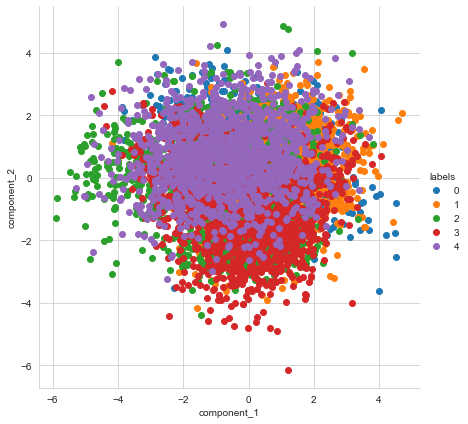

In [64]:
sns.set_style("whitegrid");
sns.FacetGrid(pca_data, hue='labels', height=6) \
 .map(plt.scatter, "component_1", "component_2") \
 .add_legend();
plt.show();

## Sklearn's PCA Implementation

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
std_data=sc.fit_transform(x)

pca = PCA(n_components=2)
data=pca.fit_transform(std_data)

In [46]:
pca_data=pd.DataFrame(data,columns=['component_'+str(i) for i in range(1,2+1)])
pca_data['labels']=y

In [47]:
pca_data

component_1  component_2  labels
0       -1.326336     0.862961       1
1        0.442725    -1.412165       1
2        1.727925     0.196823       4
3       -2.490320     0.251176       0
4        0.406685    -1.468082       4
...           ...          ...     ...
6995     1.643138     0.502255       4
6996    -0.378661     1.825392       3
6997    -0.101363     1.019865       3
6998     0.256739    -2.225123       3
6999    -0.289798     1.529804       4

[7000 rows x 3 columns]

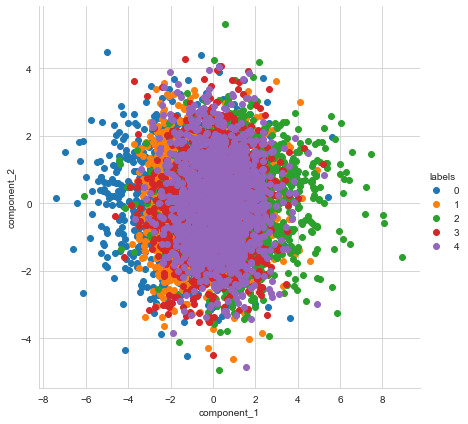

In [48]:
sns.set_style("whitegrid");
sns.FacetGrid(pca_data, hue='labels', height=6) \
 .map(plt.scatter, "component_1", "component_2") \
 .add_legend();
plt.show();

In [49]:
pca = PCA()
data=pca.fit_transform(std_data)

In [50]:
pca.explained_variance_ratio_

array([3.96023316e-03, 2.21318681e-03, 2.20743407e-03, 2.20263588e-03,
       2.19106339e-03, 2.17150019e-03, 2.16257213e-03, 2.15874895e-03,
       2.15509473e-03, 2.14872874e-03, 2.14298040e-03, 2.14044796e-03,
       2.13349939e-03, 2.12631999e-03, 2.12064515e-03, 2.11345329e-03,
       2.10596594e-03, 2.10169167e-03, 2.09594727e-03, 2.09242877e-03,
       2.08662741e-03, 2.07934618e-03, 2.07670025e-03, 2.06860653e-03,
       2.06551705e-03, 2.06137602e-03, 2.05870231e-03, 2.05399182e-03,
       2.05166206e-03, 2.04728457e-03, 2.04526409e-03, 2.04345679e-03,
       2.03801410e-03, 2.03028329e-03, 2.02838803e-03, 2.02557370e-03,
       2.02164516e-03, 2.01412818e-03, 2.01249360e-03, 2.00841928e-03,
       2.00697875e-03, 2.00019970e-03, 1.99593635e-03, 1.99240555e-03,
       1.98557089e-03, 1.98226766e-03, 1.97799960e-03, 1.97521143e-03,
       1.96856658e-03, 1.96771740e-03, 1.96495679e-03, 1.95978384e-03,
       1.95724139e-03, 1.95139456e-03, 1.94988493e-03, 1.94901512e-03,
      

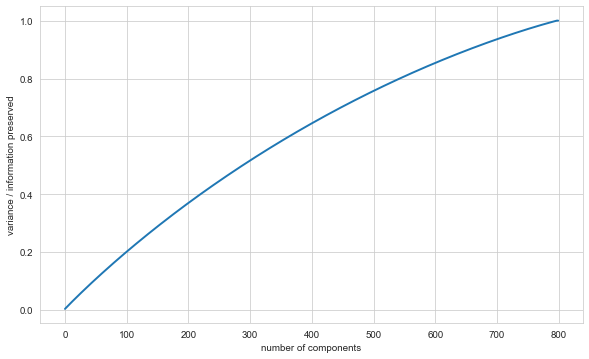

In [53]:
# Calculation variance explained for each component 
# % variance explained / information preserved = ∑λ(number of components) / ∑ λi where λ=eigen values 

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6), dpi=70)
plt.clf()
plt.plot(np.cumsum(pca.explained_variance_ratio_),linewidth=2)
plt.xlabel('number of components')
plt.ylabel('variance / information preserved')
plt.show()



In [ ]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# from numpy.linalg import eig
# import matplotlib.pyplot as plt
# import seaborn as sns

# class PCA:
#     def __init__(self,n_components=2):
        
#         '''
#         Default n_components=2
#         '''
        
#         self.n_components=n_components
        
#     def fit(self,data,standardized_data=True):
       
#         '''
#         standardized_data=True tells that the data passed is already standardized.
#         if standardized_data=False then fit function will standardize the data 
#         '''
        
#         if standardized_data==False:
#             sc=StandardScaler()
#             std_data=sc.fit_transform(data)
#         else:
#             std_data=data
            
#         covariance_matrix = (np.matmul(std_data.T,std_data))/std_data.shape[0]
#         self.covariance_matrix=covariance_matrix
#         self.eig_values,self.eig_vectors=eig(self.covariance_matrix)
        
#         sorted_eig_vectors_idx=np.argsort(self.eig_values)[::-1]
#         self.n_eigen_vectors=self.eig_vectors[:,sorted_eig_vectors_idx[:self.n_components]]
    
#     def eigen_vectors(self):
#         '''
#         Returns eigen vectors
#         '''
#         return self.n_eig_vectors
    
#     def eigen_values(self):
#         '''
#         Returns eigen values
#         '''
#         return np.sort(self.eig_values)[::-1][:self.n_components]
    
#     def explained_variance(self):
#         '''
#         Returns variance explained by each of the components.
#         '''
        
#         self.exp_var=list()
#         for i in np.sort(self.eig_values)[::-1]:
#             ev=i/np.sum(self.eig_values)
#             self.exp_var.append(ev)
            
#         return np.cumsum(self.exp_var)
    
#     def plot_explained_variance(self):
#         '''
#         This function returns a graph of : number of components vs variance / information preserved
#         '''
#         self.exp_var=list()
#         for i in np.sort(self.eig_values)[::-1]:
#             ev=i/np.sum(self.eig_values)
#             self.exp_var.append(ev)
            
#         sns.set_style('whitegrid')
#         plt.figure(figsize=(10, 6), dpi=70)
#         plt.clf()
#         plt.plot(np.cumsum(self.exp_var),linewidth=2)
#         plt.xlabel('number of components')
#         plt.ylabel('variance / information preserved')
#         plt.show()
        
#     def transform(self,data,standardized_data=True):
#         if standardized_data==False:
#             sc=StandardScaler()
#             std_data=sc.fit_transform(data)
#         else:
#             std_data=data
            
#         self.pca_data=np.matmul(std_data,self.n_eigen_vectors)
#         return self.pca_data